In [39]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

In [57]:
# Reading in shark data
data = pd.read_csv("../data/clean_sharks.csv", usecols=['Month', 'Year', 'Type', 'Sex', 'Area', 'Fatal (Y/N)'])
data.tail()
data.to_csv("../data/Categorical_data.csv")

In [46]:
# Use label encoder 
data['Area'] = data['Area'].str.lower()

encoder = LabelEncoder()
data['Area'] = encoder.fit_transform(data['Area'])
data['Sex'] = encoder.fit_transform(data['Sex'])
data['Month'] = encoder.fit_transform(data['Month'])
data['Year'] = encoder.fit_transform(data['Year'])
data['Type'] = encoder.fit_transform(data['Type'])

In [49]:
# save data
df = data
df.head()

,Month,Year,Type,Area,Sex,Fatal (Y/N)
0,5,73,1,7,0,N
1,7,72,0,7,1,N
2,4,71,1,11,1,N
3,4,71,1,7,1,N
4,1,69,1,7,1,N


In [58]:
# Test train split
trainCat , testCat = train_test_split(df, test_size=.4)

# save labels
trainCat_label = trainCat['Fatal (Y/N)']
testCat_label = testCat['Fatal (Y/N)']

# drop label column
trainCat = trainCat.drop(['Fatal (Y/N)'], axis=1)
testCat = testCat.drop(['Fatal (Y/N)'], axis=1)

print("Testing Cat:", testCat.head(4))
print("Training Cat:", trainCat.head(4))

Testing Cat:       Month  Year  Type  Area  Sex
892      11    68     1     3    1
1499      4    23     1    11    1
1509      4    72     1     7    0
1688      1    19     1     7    1
Training Cat:       Month  Year  Type  Area  Sex
1396      1    64     0     7    1
631       1    26     1    25    1
115       7    29     1     7    1
144       5    65     1     7    1


In [54]:
# Categorical Model

MyCat = CategoricalNB()

MyCat_Model = MyCat.fit(trainCat, trainCat_label)

print(MyCat_Model.classes_)
print(MyCat_Model.class_count_)

# precti
Predictions_Cat = MyCat_Model.predict(testCat)
print("prediction:", Predictions_Cat)

['N' 'Y']
[1007.   48.]
prediction: ['N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'Y' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N' 'N'
 'N' 'Y' 'N' 'N

In [55]:
# Print the actual probability
print(MyCat_Model.predict_proba(testCat))

print("Mean accruacy on the given test data and labels:", round(MyCat_Model.score(testCat, testCat_label),3))

[[0.98753224 0.01246776]
 [0.99384204 0.00615796]
 [0.99214619 0.00785381]
 ...
 [0.98647803 0.01352197]
 [0.97252907 0.02747093]
 [0.99648903 0.00351097]]
Mean accruacy on the given test data and labels: 0.953


[[671   6]
 [ 27   0]]


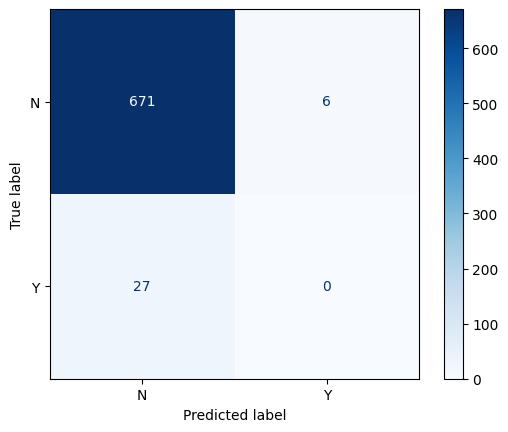

In [56]:
# Confusion matrix
Confusion = confusion_matrix(testCat_label, Predictions_Cat)
print(Confusion)

display = ConfusionMatrixDisplay(confusion_matrix=Confusion, display_labels=MyCat_Model.classes_)
display.plot(cmap='Blues')
plt.show()
